In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
data = pd.read_csv("./top5_final_data.csv")

In [2]:
data

,아파트 브랜드_롯데캐슬,아파트 브랜드_자이,아파트 브랜드_푸르지오,아파트 브랜드_힐스테이트,계약연도2021,계약연도2022,cluster 1,cluster 3,cluster 4,cluster 5,...,NASDAQ_change_rate,DOW Jones_close,DOW Jones_change_rate,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate,평당가
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.020089,28519.731600,-0.012474,1220.65,-5.51,1987.01,-6.23,610.73,-4.94,9647.193456
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.020089,28519.731600,-0.012474,1220.65,-5.51,1987.01,-6.23,610.73,-4.94,9495.929741
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.020089,28519.731600,-0.012474,1220.65,-5.51,1987.01,-6.23,610.73,-4.94,9457.011996
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.066931,23293.899833,0.029000,1187.44,9.01,1947.56,10.99,645.18,13.37,9922.827555
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.098071,24271.021387,0.041948,1238.06,4.26,2029.60,4.21,713.68,10.62,8951.081313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17394,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.012270,33482.257254,0.001924,1316.55,-8.92,2236.40,-9.55,679.29,-6.89,3476.293941
17395,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.012270,33482.257254,0.001924,1316.55,-8.92,2236.40,-9.55,679.29,-6.89,3306.957161
17396,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.034727,31446.712798,-0.028807,1395.39,-13.61,2332.64,-13.15,745.44,-16.56,5551.595387
17397,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.081533,33009.564878,0.046749,1468.88,-0.18,2472.05,0.84,807.04,0.43,5058.120242


In [3]:
column_rename_dict = {
    '계약년월': '계약연월', 
    '층': '층', 
    '매칭구': '구', 
    '건축년도': '건축년도', 
    '건설수주_건축(단위 백만원)': '건축수주액', 
    '건설수주_주택(단위 백만원)': '주택수주액', 
    '매매가격지수(아파트)': '매매가격지수', 
    '경상수지(백만불)': '경상수지', 
    '무역수지(백만불)': '무역수지', 
    '대출금액(아파트)(억원)': '대출금액', 
    '대출잔액(아파트)(억원)': '대출잔액', 
    '서울_신규_분양세대(단위: 세대)': '신규분양세대', 
    '아파트 동(호)수_(단위: 호)': '동수(호)', 
    '아파트 건물면적_(천)': '건물면적', 
    '생산자물가지수 총지수 ': '생산자물가지수', 
    '전규모(1인이상) 전체임금총액[원]': '임금총액', 
    '소비자물가지수 총지수 ': '소비자물가지수', 
    '소비자물가지수 주택, 수도, 전기 및 연료': '주택관련물가지수', 
    '가계대출 (연리%)': '가계대출금리', 
    '경기종합지수(2020=100)': '경기종합지수', 
    '경제활동인구_ 실업률(단위: %)': '실업률', 
    '경제활동인구_고용률(단위: %)': '고용률', 
    '경제활동인구_취업자(단위: 천명)': '취업자수', 
    '국제 주요국 주가지수(KOSPI)': 'KOSPI지수', 
    '예금은행 대출금리(신규취급액 기준)_대출평균(연%)': '신규대출금리', 
    '예금은행 대출금리(잔액 기준)_총대출(연리%)': '총대출금리', 
    '주택매매가격지수(KB)_서울': '서울주택가격지수', 
    '소비자물가지수_총지수(가중치:1000?)': '가중치소비자물가지수', 
    '원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원': '환율', 
    '경기종합지수': '경기종합지수', 
    'S&P 500_close': 'S&P500종가', 
    'NASDAQ_close': '나스닥종가', 
    'DOW Jones_close': '다우존스종가', 
    'KRX300_close': 'KRX300종가', 
    'KOSPI_close': 'KOSPI종가', 
    'KOSDAQ_close': 'KOSDAQ종가', 
    '평당가': '평당가'
}

data = data.rename(columns=column_rename_dict)


In [4]:
data.columns

Index(['아파트 브랜드_롯데캐슬', '아파트 브랜드_자이', '아파트 브랜드_푸르지오', '아파트 브랜드_힐스테이트',
       '계약연도2021', '계약연도2022', 'cluster 1', 'cluster 3', 'cluster 4',
       'cluster 5', '층', '건축년도', '건축수주액', '주택수주액', '매매가격지수', '경상수지', '무역수지',
       '대출금액', '대출잔액', '신규분양세대', '동수(호)', '생산자물가지수', '임금총액', '소비자물가지수',
       '주택관련물가지수', '가계대출금리', '경기종합지수', '실업률', '고용률', '취업자수', 'KOSPI지수',
       '신규대출금리', '총대출금리', '서울주택가격지수', '가중치소비자물가지수', '환율', '경기종합지수', 'S&P500종가',
       'S&P 500_change_rate', '나스닥종가', 'NASDAQ_change_rate', '다우존스종가',
       'DOW Jones_change_rate', 'KRX300종가', 'KRX300_change_rate', 'KOSPI종가',
       'KOSPI_change_rate', 'KOSDAQ종가', 'KOSDAQ_change_rate', '평당가'],
      dtype='object')

In [5]:
selected_columns = ['아파트 브랜드_롯데캐슬', '아파트 브랜드_자이', '아파트 브랜드_푸르지오', '아파트 브랜드_힐스테이트',
                   'cluster 1', 'cluster 3', 'cluster 4', 'cluster 5', '계약연도2021', '계약연도2022','건축년도', '건축수주액', '대출금액',
                   '동수(호)', '임금총액', '고용률','총대출금리','실업률', '나스닥종가','평당가']

In [6]:
data_selected_columns = data[selected_columns]
# 선택된 열들을 출력
print(data_selected_columns.head())
import pandas as pd
df = pd.DataFrame(data_selected_columns)
# 열 이름 변경
df.columns = [col.replace('[', '').replace(']', '').replace('<', '').replace('>', '') for col in df.columns]
# 변경된 열 이름 출력
print(df.columns)
data = data_selected_columns

   아파트 브랜드_롯데캐슬  아파트 브랜드_자이  아파트 브랜드_푸르지오  아파트 브랜드_힐스테이트  cluster 1  \
0           0.0         0.0           0.0            0.0        0.0   
1           0.0         0.0           0.0            0.0        0.0   
2           0.0         0.0           0.0            0.0        0.0   
3           0.0         0.0           0.0            0.0        0.0   
4           0.0         0.0           0.0            0.0        0.0   

   cluster 3  cluster 4  cluster 5  계약연도2021  계약연도2022  건축년도       건축수주액  \
0        0.0        0.0        0.0       0.0       0.0  2019   9277921.0   
1        0.0        0.0        0.0       0.0       0.0  2019   9277921.0   
2        0.0        0.0        0.0       0.0       0.0  2019   9277921.0   
3        0.0        0.0        0.0       0.0       0.0  2019   7187557.0   
4        0.0        0.0        0.0       0.0       0.0  2019  10945748.0   

        대출금액  동수(호)     임금총액   고용률  총대출금리  실업률        나스닥종가          평당가  
0  46672.995   9522  3403361  60.0   3.35

In [7]:
from sklearn.model_selection import train_test_split
# features와 target 정의
train = data[selected_columns]
train = train.drop('평당가', axis=1)

target = data['평당가']

In [8]:
train.columns

Index(['아파트 브랜드_롯데캐슬', '아파트 브랜드_자이', '아파트 브랜드_푸르지오', '아파트 브랜드_힐스테이트',
       'cluster 1', 'cluster 3', 'cluster 4', 'cluster 5', '계약연도2021',
       '계약연도2022', '건축년도', '건축수주액', '대출금액', '동수(호)', '임금총액', '고용률', '총대출금리',
       '실업률', '나스닥종가'],
      dtype='object')

In [9]:
target

0        9647.193456
1        9495.929741
2        9457.011996
3        9922.827555
4        8951.081313
            ...     
17394    3476.293941
17395    3306.957161
17396    5551.595387
17397    5058.120242
17398    6466.092910
Name: 평당가, Length: 17399, dtype: float64

train(X)값과 target(y)값 나눠주기

In [10]:
train

,아파트 브랜드_롯데캐슬,아파트 브랜드_자이,아파트 브랜드_푸르지오,아파트 브랜드_힐스테이트,cluster 1,cluster 3,cluster 4,cluster 5,계약연도2021,계약연도2022,건축년도,건축수주액,대출금액,동수(호),임금총액,고용률,총대출금리,실업률,나스닥종가
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,9277921.0,46672.995,9522,3403361,60.0,3.35,4.1,9418.850021
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,9277921.0,46672.995,9522,3403361,60.0,3.35,4.1,9418.850021
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,9277921.0,46672.995,9522,3403361,60.0,3.35,4.1,9418.850021
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,7187557.0,20871.755,3699,3358565,59.4,3.21,4.2,8292.407180
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,10945748.0,18127.483,4328,3287099,60.2,3.14,4.5,9105.655469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17394,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2008,14731854.0,33635.767,1001,4433753,61.3,4.92,3.0,10838.995815
17395,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2008,14731854.0,33635.767,1001,4433753,61.3,4.92,3.0,10838.995815
17396,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2011,19081016.0,13267.086,2014,3662766,62.9,3.57,3.0,11418.919085
17397,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2011,13709893.0,8700.338,907,3701953,62.8,3.91,2.1,12570.260403


In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

#train 0.6 / val 0.2 / test 0.2
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(10439, 19) (3480, 19) (3480, 19) (10439,) (3480,) (3480,)


In [12]:
X_train.columns

Index(['아파트 브랜드_롯데캐슬', '아파트 브랜드_자이', '아파트 브랜드_푸르지오', '아파트 브랜드_힐스테이트',
       'cluster 1', 'cluster 3', 'cluster 4', 'cluster 5', '계약연도2021',
       '계약연도2022', '건축년도', '건축수주액', '대출금액', '동수(호)', '임금총액', '고용률', '총대출금리',
       '실업률', '나스닥종가'],
      dtype='object')

In [13]:
# X_train = X_train[select_columns]
# X_val = X_val[select_columns]
# X_test = X_test[select_columns]

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_val_scaler = scaler.fit_transform(X_val)
X_test_scaler = scaler.fit_transform(X_test)

In [15]:
#결과 잘 나옴
X_train_scaler

array([[-0.37881228, -0.39290399, -0.45093563, ..., -0.59538113,
        -0.23263458, -0.10215775],
       [-0.37881228, -0.39290399, -0.45093563, ..., -0.1311619 ,
         0.19413697, -0.56355763],
       [ 2.63982997, -0.39290399, -0.45093563, ...,  0.36400526,
         0.90542288, -1.25129198],
       ...,
       [-0.37881228, -0.39290399, -0.45093563, ..., -0.65727702,
        -0.65940613,  0.0750419 ],
       [-0.37881228, -0.39290399,  2.21761143, ..., -0.47158933,
        -0.37489176, -0.27310593],
       [-0.37881228, -0.39290399,  2.21761143, ..., -0.68822497,
         0.33639415,  0.48179524]])

In [16]:
print(X_train_scaler.shape)
print(y_train.shape)

(10439, 19)
(10439,)


In [17]:
from tarfile import XGLTYPE
#학습을 위한 라이브러리 세팅
from sklearn.linear_model import LinearRegression # 1. Linear Regression
from sklearn.linear_model import Lasso            # 2. Lasso
from sklearn.linear_model import Ridge            # 3. Ridge
from xgboost.sklearn import XGBRegressor          # 4. XGBoost (xgboost.sklearn으로 해야지 sklearn으로 학습 할 수 있는 라이브러리를 불러옴)
from lightgbm.sklearn import LGBMRegressor        # 5. LightGBM
from sklearn.ensemble import RandomForestRegressor# 6. RandomForestRegressor
from catboost import CatBoostRegressor            # 7. CatBoostRegressor
#평가지표
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



In [18]:
#모델 훈련 함수
def train_models(X_train, y_train):
    models = {
        "LinearRegression": LinearRegression(),
        "Lasso": Lasso(),
        "Ridge": Ridge(),
        "XGBRegressor": XGBRegressor(),
        "LGBMRegressor": LGBMRegressor(),
        "RandomForestRegressor": RandomForestRegressor(),
        "CatBoostRegressor" : CatBoostRegressor(),
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        models[name] = model

    return models


In [19]:
#train, val 시각화 함수
from math import sqrt

# 결과 시각화 함수
def evaluate_models(models, X_train, y_train, X_val, y_val):
    max_name_length = max([len(name) for name in models.keys()]) + 1  # 최대 모델 이름 길이 계산

    print("Model Performance Evaluation:\n")
    header = f"{'Model'.ljust(max_name_length)}    \tTrain RMSE\t\tVal RMSE    \t\tTrain R²\tVal R²"
    print(header)
    print("-" * len(header))

    for name, model in models.items():
        pred_train = model.predict(X_train)
        pred_val = model.predict(X_val)

        mse_train = mean_squared_error(y_train, pred_train)
        mse_val = mean_squared_error(y_val, pred_val)
        rmse_train = sqrt(mse_train)
        rmse_val = sqrt(mse_val)
        r2_train = r2_score(y_train, pred_train)
        r2_val = r2_score(y_val, pred_val)

        print(f"{name.ljust(max_name_length)}\t{rmse_train:.4f}\t\t{rmse_val:.4f}\t\t{r2_train:.2f}\t\t{r2_val:.2f}")


In [20]:
#모델 test 평가 함수
from math import sqrt
import matplotlib.pyplot as plt

# train, val 시각화 함수
def plot_mse_for_models_line(models, X_train, y_train, X_val, y_val):
    # 모델별 RMSE 저장을 위한 리스트
    train_rmse_list = []
    val_rmse_list = []
    model_names = []

    # 각 모델별로 RMSE 계산
    for name, model in models.items():
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        val_pred = model.predict(X_val)

        train_rmse = sqrt(mean_squared_error(y_train, train_pred))
        val_rmse = sqrt(mean_squared_error(y_val, val_pred))

        train_rmse_list.append(train_rmse)
        val_rmse_list.append(val_rmse)
        model_names.append(name)

    # 선형 그래프로 RMSE 결과 시각화
    plt.figure(figsize=(15, 7))
    plt.plot(model_names, train_rmse_list, marker='o', label='Training RMSE')
    plt.plot(model_names, val_rmse_list, marker='o', label='Validation RMSE')

    plt.ylabel('RMSE')
    plt.title('Training and Validation RMSE for Different Models')
    plt.legend()

    plt.show()


In [21]:
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score

# 모델 test 평가 함수
def evaluate_models_on_test(models, X_test, y_test):
    max_name_length = max([len(name) for name in models.keys()]) + 1  # 최대 모델 이름 길이 계산

    print("Model Test Performance Evaluation:\n")
    header = f"{'Model'.ljust(max_name_length)}\tTest RMSE\t\tTest R²"
    print(header)
    print("---------------------------------------------------------")

    for name, model in models.items():
        pred_test = model.predict(X_test)

        rmse_test = sqrt(mean_squared_error(y_test, pred_test))
        r2_test = r2_score(y_test, pred_test)

        print(f"{name.ljust(max_name_length)}\t{rmse_test:.4f}\t\t{r2_test * 100:.2f}%")


In [22]:
#모델 훈련
models = train_models(X_train_scaler, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002556 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 10439, number of used features: 19
[LightGBM] [Info] Start training from score 4805.774042
Learning rate set to 0.05931
0:	learn: 1548.3751901	total: 145ms	remaining: 2m 24s
1:	learn: 1522.9350153	total: 150ms	remaining: 1m 14s
2:	learn: 1496.3727177	total: 155ms	remaining: 51.7s
3:	learn: 1474.3336211	total: 161ms	remaining: 40.1s
4:	learn: 1452.7052022	total: 165ms	remaining: 32.9s
5:	learn: 1435.1051489	total: 169ms	remaining: 28s
6:	learn: 1414.9230711	total: 173ms	remaining: 24.5s
7:	learn: 1398.4183210	total: 175ms	remaining: 21.7s
8:	learn: 1386.2363993	total: 178ms	remaining: 19.6s
9:	learn: 1370.5088435	total: 181ms	remaining: 17.9s
10:	learn: 1357.7816437	total: 184ms	remaining: 16.6s
11:	learn: 1344.0875422	total: 187ms	remain

In [23]:
#모델 성능평가
evaluate_models(models, X_train_scaler, y_train, X_val_scaler, y_val)

Model Performance Evaluation:

Model                     	Train RMSE		Val RMSE    		Train R²	Val R²
--------------------------------------------------------------------
LinearRegression      	1238.7052		1243.9194		0.38		0.36
Lasso                 	1238.7378		1244.0610		0.38		0.36
Ridge                 	1238.7052		1243.9226		0.38		0.36
XGBRegressor          	786.1683		941.6728		0.75		0.64
LGBMRegressor         	889.0025		967.5221		0.68		0.62
RandomForestRegressor 	724.6379		959.2548		0.79		0.62
CatBoostRegressor     	836.6869		929.3361		0.72		0.64


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 10439, number of used features: 19
[LightGBM] [Info] Start training from score 4805.774042
Learning rate set to 0.05931
0:	learn: 1548.3751901	total: 4.95ms	remaining: 4.94s
1:	learn: 1522.9350153	total: 11.9ms	remaining: 5.95s
2:	learn: 1496.3727177	total: 17.9ms	remaining: 5.95s
3:	learn: 1474.3336211	total: 23.1ms	remaining: 5.74s
4:	learn: 1452.7052022	total: 28.5ms	remaining: 5.67s
5:	learn: 1435.1051489	total: 31.6ms	remaining: 5.23s
6:	learn: 1414.9230711	total: 35.3ms	remaining: 5.01s
7:	learn: 1398.4183210	total: 38.3ms	remaining: 4.75s
8:	learn: 1386.2363993	total: 41.2ms	remaining: 4.54s
9:	learn: 1370.5088435	total: 44ms	remaining: 4.35s
10:	learn: 1357.7816437	t

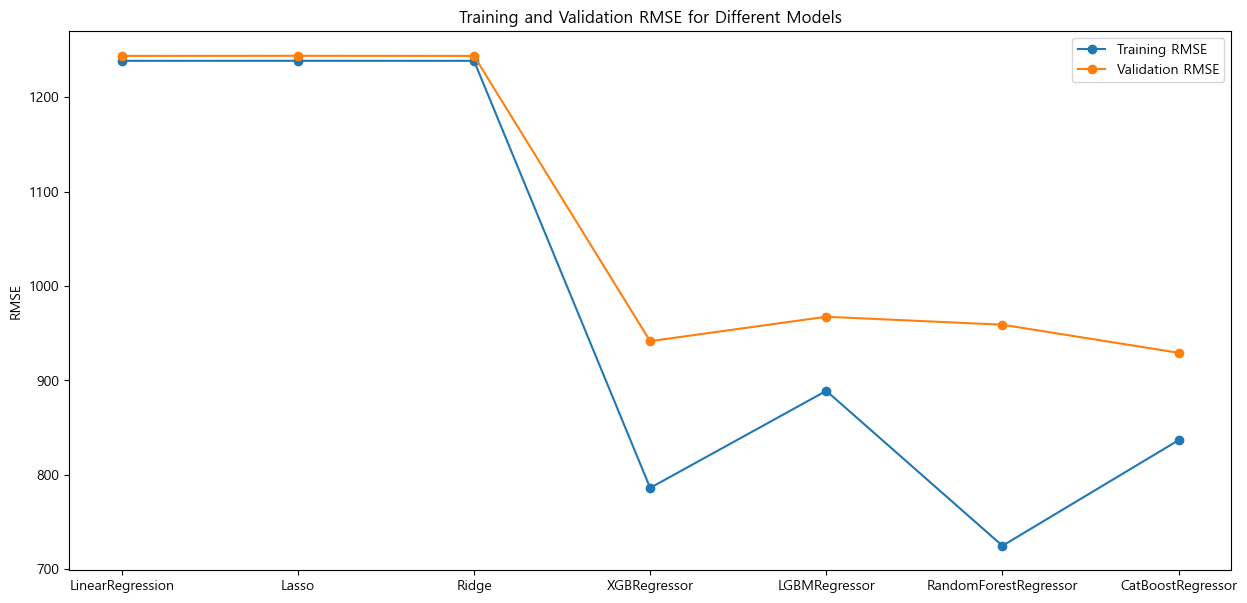

In [24]:
#결과 시각화
plot_mse_for_models_line(models, X_train_scaler, y_train, X_val_scaler, y_val)

In [25]:
#모델 test평가
evaluate_models_on_test(models, X_test_scaler, y_test)

Model Test Performance Evaluation:

Model                 	Test RMSE		Test R²
---------------------------------------------------------
LinearRegression      	1205.4774		40.66%
Lasso                 	1205.4521		40.66%
Ridge                 	1205.4788		40.66%
XGBRegressor          	912.1202		66.03%
LGBMRegressor         	941.8256		63.78%
RandomForestRegressor 	941.4300		63.81%
CatBoostRegressor     	895.5113		67.25%


# xgboost early stop

[0]	validation_0-rmse:3649.39025	validation_1-rmse:3689.06669
[1]	validation_0-rmse:2693.80174	validation_1-rmse:2731.27822
[2]	validation_0-rmse:2059.66340	validation_1-rmse:2098.66516
[3]	validation_0-rmse:1652.66941	validation_1-rmse:1698.33805
[4]	validation_0-rmse:1404.66477	validation_1-rmse:1447.66515
[5]	validation_0-rmse:1245.39832	validation_1-rmse:1289.57221
[6]	validation_0-rmse:1157.44438	validation_1-rmse:1204.30900
[7]	validation_0-rmse:1106.47700	validation_1-rmse:1155.47348
[8]	validation_0-rmse:1068.74025	validation_1-rmse:1118.16198
[9]	validation_0-rmse:1053.25404	validation_1-rmse:1103.75889
[10]	validation_0-rmse:1040.46390	validation_1-rmse:1093.45406
[11]	validation_0-rmse:1008.88277	validation_1-rmse:1065.08870
[12]	validation_0-rmse:1002.67973	validation_1-rmse:1060.27950
[13]	validation_0-rmse:983.56307	validation_1-rmse:1043.83628
[14]	validation_0-rmse:976.13151	validation_1-rmse:1037.40115
[15]	validation_0-rmse:967.04894	validation_1-rmse:1029.21727
[16]	

c:\Users\vivid\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
c:\Users\vivid\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[44]	validation_0-rmse:842.53141	validation_1-rmse:951.76550
[45]	validation_0-rmse:840.13465	validation_1-rmse:950.36227
[46]	validation_0-rmse:837.22537	validation_1-rmse:949.37457
[47]	validation_0-rmse:836.12641	validation_1-rmse:948.33319
[48]	validation_0-rmse:835.46708	validation_1-rmse:948.90413
[49]	validation_0-rmse:834.60673	validation_1-rmse:948.61965
[50]	validation_0-rmse:833.09777	validation_1-rmse:948.07500
[51]	validation_0-rmse:832.52188	validation_1-rmse:947.84153
[52]	validation_0-rmse:828.72956	validation_1-rmse:945.75071
[53]	validation_0-rmse:826.81042	validation_1-rmse:944.74828
[54]	validation_0-rmse:826.28635	validation_1-rmse:944.78543
[55]	validation_0-rmse:824.82302	validation_1-rmse:944.39946
[56]	validation_0-rmse:823.06764	validation_1-rmse:944.36930
[57]	validation_0-rmse:821.92199	validation_1-rmse:943.86381
[58]	validation_0-rmse:820.24044	validation_1-rmse:944.11287
[59]	validation_0-rmse:819.22742	validation_1-rmse:943.87450
[60]	validation_0-rmse:8

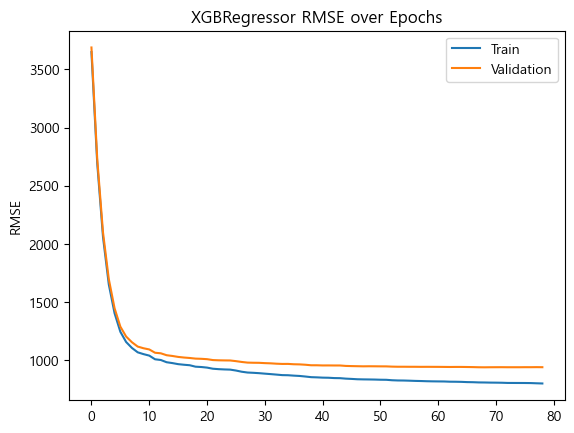

Xgboost Best Epoch:  68


In [26]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


reg_xgb = XGBRegressor()
eval_set = [(X_train_scaler, y_train), (X_val_scaler, y_val)]
reg_xgb.fit(X_train_scaler, y_train, eval_metric="rmse", eval_set=eval_set,
            early_stopping_rounds=10, verbose=True)
# Accessing the RMSE values stored during training
results = reg_xgb.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# Plotting
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Validation')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBRegressor RMSE over Epochs')
plt.show()

best_epoch = reg_xgb.best_iteration
print("Xgboost Best Epoch: ", best_epoch)

# xgboost best_iteration으로 test 진행(EPOCH 38)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# 테스트 데이터셋에 대한 예측 수행 (최적의 에포크를 사용)
pred_test = reg_xgb.predict(X_test_scaler, iteration_range=(0, best_epoch + 1))

# 테스트 데이터셋에 대한 성능 평가
mse_test = mean_squared_error(y_test, pred_test)
rmse_test = sqrt(mse_test)  # RMSE 계산
r2_test = r2_score(y_test, pred_test)

# 결과 출력
print("XGBoost Test RMSE: ", rmse_test)
print("XGBoost Test R² Score: {:.2f}%".format(r2_test * 100))


XGBoost Test RMSE:  912.8694817445203
XGBoost Test R² Score: 65.97%


# light gbm early stop 적용

Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[200]	valid_0's rmse: 946.92	valid_0's l2: 896658


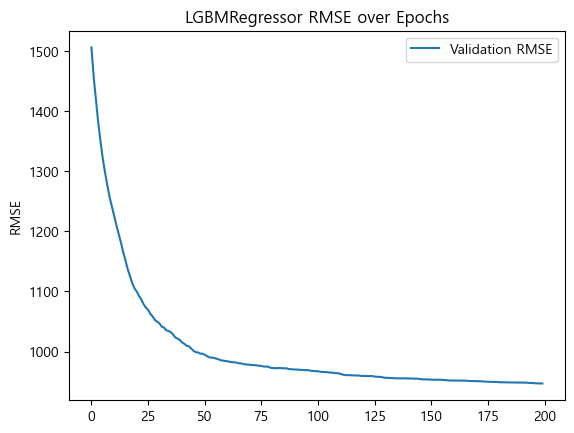

Best Iteration:  200


In [28]:
from lightgbm import LGBMRegressor, early_stopping
import matplotlib.pyplot as plt

# Initialize the model with verbosity settings
reg_lgbm = LGBMRegressor(verbose=-1, n_estimators=200)  # Set to -1 to suppress output, or a positive integer for verbosity
eval_set = [(X_val_scaler, y_val)]  # Evaluation set for early stopping

# Fit the model with early stopping
reg_lgbm.fit(X_train_scaler, y_train, eval_metric="rmse", eval_set=eval_set,
             callbacks=[early_stopping(stopping_rounds=10)])

# Accessing the RMSE values
results = reg_lgbm.evals_result_
epochs = len(results['valid_0']['rmse'])  # Adjust the key based on your evals_result structure
x_axis = range(0, epochs)

# Plotting
fig, ax = plt.subplots()
ax.plot(x_axis, results['valid_0']['rmse'], label='Validation RMSE')
ax.legend()
plt.ylabel('RMSE')
plt.title('LGBMRegressor RMSE over Epochs')
plt.show()

# Best iteration
best_iteration = reg_lgbm.best_iteration_
print("Best Iteration: ", best_iteration)


# LightGBM best_iteration으로 test 진행(EPOCH 131)

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# 테스트 데이터셋에 대한 예측 수행
pred_test = reg_lgbm.predict(X_test_scaler, num_iteration=best_iteration)

# 테스트 데이터셋에 대한 성능 평가
mse_test = mean_squared_error(y_test, pred_test)
rmse_test = sqrt(mse_test)  # RMSE 계산
r2_test = r2_score(y_test, pred_test)

# 결과 출력
print("LightGBM Test RMSE: ", rmse_test)
print("LightGBM Test R² Score: {:.2f}%".format(r2_test * 100))


LightGBM Test RMSE:  925.0770065423649
LightGBM Test R² Score: 65.06%


# 아래 코드에서 ipywidgets오류나면 설치하기

In [30]:
#pip install ipywidgets

# catboost early stop

In [31]:
from catboost import CatBoostRegressor

# CatBoost 모델 초기화
reg_catboost = CatBoostRegressor(verbose=0, n_estimators=200, eval_metric='RMSE')

# Evaluation set for early stopping
eval_set = [(X_val_scaler, y_val)]

# 모델 훈련 (학습 과정 시각화)
reg_catboost.fit(X_train_scaler, y_train, eval_set=eval_set, early_stopping_rounds=10, plot=True)

# 최적의 반복 횟수 추출
best_iteration_catboost = reg_catboost.get_best_iteration()

print(best_iteration_catboost)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

198


In [32]:
# 테스트 데이터셋에 대한 예측 수행
pred_test_catboost = reg_catboost.predict(X_test_scaler, ntree_end=best_iteration_catboost)

# 테스트 데이터셋에 대한 성능 평가
mse_test_catboost = mean_squared_error(y_test, pred_test_catboost)
rmse_test_catboost = sqrt(mse_test_catboost)
r2_test_catboost = r2_score(y_test, pred_test_catboost)

# 결과 출력
print("CatBoost Test RMSE: ", rmse_test_catboost)
print("CatBoost Test R² Score: {:.2f}%".format(r2_test_catboost * 100))

CatBoost Test RMSE:  911.8446456403964
CatBoost Test R² Score: 66.05%


# Random Forest Grid Search

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Random Forest 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],  # 트리의 개수
    'max_features': ['auto', 'sqrt', 'log2'],  # 분할에 사용하는 특성의 수
    'max_depth': [4, 6, 8, 10, 12],  # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],  # 내부 노드를 분할하는데 필요한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4]  # 잎 노드에 있어야 하는 최소 샘플 수
}


# Random Forest grid search 오래걸려서 길게는 안 돌려봄

In [34]:
# # Random Forest 회귀 모델 생성
# rf = RandomForestRegressor(random_state=42)

# # GridSearchCV 객체 생성
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=1, verbose=0, scoring='neg_mean_squared_error')

# # Grid Search 수행
# grid_search.fit(X_train_scaler, y_train)

# # 최적의 매개변수 출력
# print("Best Parameters:", grid_search.best_params_)

# # 최적 매개변수로 훈련된 모델 추출
# best_rf = grid_search.best_estimator_

# # 테스트 데이터셋에 대한 예측 수행
# pred_test = best_rf.predict(X_test_scaler)

# # 성능 평가
# mse_test = mean_squared_error(y_test, pred_test)
# rmse_test = sqrt(mse_test)
# r2_test = r2_score(y_test, pred_test)

# # 결과 출력
# print("Optimized Random Forest Test RMSE: ", rmse_test)
# print("Optimized Random Forest Test R² Score: {:.2f}%".format(r2_test * 100))


# 분석

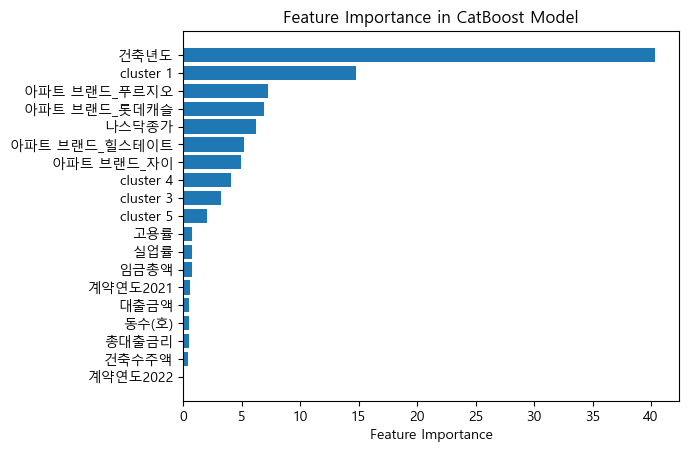

In [35]:
import matplotlib.pyplot as plt

# 데이터셋의 특성(열) 이름을 가져옵니다.
features = X_train.columns

# 특성 중요도를 얻고 정렬합니다.
feature_importances = reg_catboost.get_feature_importance() #앞에 모델만 바꾸면 계속 나올것 같음!
sorted_idx = feature_importances.argsort()

# 특성 중요도를 시각화합니다.
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in CatBoost Model')
plt.show()



In [36]:
#shap 없다면,
# pip install shap

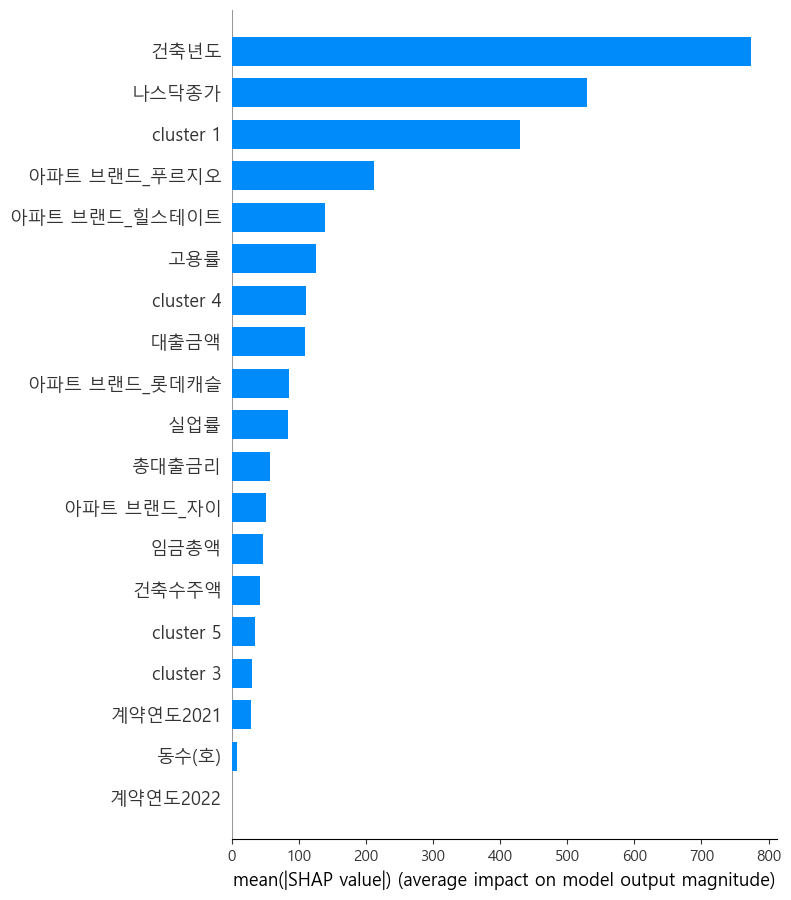

In [37]:
import shap

# SHAP 값 계산
explainer = shap.TreeExplainer(reg_catboost)
shap_values = explainer.shap_values(X_train)

# SHAP 요약 플롯
shap.summary_plot(shap_values, X_train, plot_type="bar")
